# Fitment Percent Calculator
## Importing Dataset:
lets import the libraries and the dataset required to find the result

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


Finding if there are any null values in our dataframe

In [4]:
train.isnull().any()

EmpID                      False
EmpName                    False
LanguageOfCommunication    False
Age                        False
Gender                     False
JobProfileIDApplyingFor    False
HighestDegree              False
DegreeBranch               False
GraduatingInstitute        False
LatestDegreeCGPA           False
YearsOfExperince           False
GraduationYear             False
CurrentCTC                 False
ExpectedCTC                False
MartialStatus              False
EmpScore                   False
CurrentDesignation         False
CurrentCompanyType         False
DepartmentInCompany        False
TotalLeavesTaken           False
BiasInfluentialFactor       True
FitmentPercent             False
dtype: bool

So only BiasInfluential factor seems to have null value so lets alter it in future and also lets look at the dtypes for the dataset

In [5]:
train.dtypes

EmpID                        int64
EmpName                     object
LanguageOfCommunication     object
Age                          int64
Gender                      object
JobProfileIDApplyingFor     object
HighestDegree               object
DegreeBranch                object
GraduatingInstitute         object
LatestDegreeCGPA             int64
YearsOfExperince             int64
GraduationYear               int64
CurrentCTC                   int64
ExpectedCTC                  int64
MartialStatus               object
EmpScore                     int64
CurrentDesignation          object
CurrentCompanyType          object
DepartmentInCompany         object
TotalLeavesTaken             int64
BiasInfluentialFactor       object
FitmentPercent             float64
dtype: object

In [6]:
def encode_features(df_train, choice=0):
    if choice == 0:
        df_train.BiasInfluentialFactor = df_train.BiasInfluentialFactor.fillna('NO')
        cols = ['LanguageOfCommunication', 'GraduatingInstitute', 'CurrentCompanyType', 'CurrentDesignation', 'DepartmentInCompany', 'MartialStatus', 'Gender', 'JobProfileIDApplyingFor', 'EmpName', 'DegreeBranch', 'BiasInfluentialFactor']

        for feature in cols:
            le = preprocessing.LabelEncoder()
            le = le.fit(df_train[feature])
            df_train[feature] = le.transform(df_train[feature])
    else:
        cols = ['LanguageOfCommunication', 'GraduatingInstitute', 'CurrentCompanyType', 'CurrentDesignation', 'DepartmentInCompany', 'MartialStatus', 'Gender', 'JobProfileIDApplyingFor', 'EmpName', 'DegreeBranch']

        for feature in cols:
            le = preprocessing.LabelEncoder()
            le = le.fit(df_train[feature])
            df_train[feature] = le.transform(df_train[feature])
        

    return df_train
    

In [7]:
train = encode_features(train)


## Picking out the relevant attributes for regression modelling


This is achieved by using correlation which can find the attributes which makes sense to use


In [8]:
correlation = train.corr(method='pearson')
cols = correlation.nlargest(10, 'FitmentPercent').index
cols

Index(['FitmentPercent', 'CurrentCompanyType', 'EmpScore', 'CurrentCTC',
       'ExpectedCTC', 'LatestDegreeCGPA', 'GraduationYear', 'EmpName',
       'CurrentDesignation', 'JobProfileIDApplyingFor'],
      dtype='object')

Here we can see the correlation using a plot


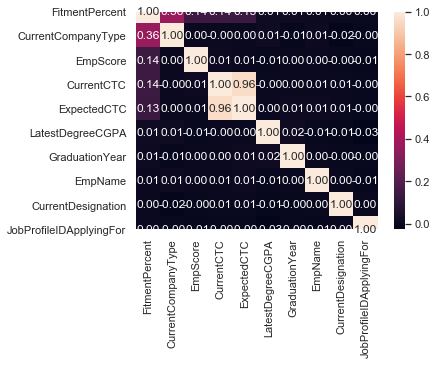

In [9]:
correlation_map = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=cols.values, xticklabels=cols.values)

plt.show()

## Picking the ideal Algorithm

Now there might be many options available to us but we have to make sure to 
pick the ideal Algorithm for our model, and also let us first split our dataset


In [10]:
X = train[cols]
Y = train['FitmentPercent'].values
X = X.drop('FitmentPercent', axis=1).values

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -185.114174 (13.416719)
ScaledLASSO: -187.881630 (13.380685)
ScaledEN: -191.405252 (13.806534)
ScaledKNN: -191.980024 (13.094075)
ScaledCART: -327.361789 (20.983912)
ScaledGBM: -156.466602 (11.006306)


#### From the output above, it looks like the Gradient Boosting Regressor operforms the best using a scaled version of the data. From this point onward, I will build the regression algorithm using the Gradient Boosting Regressor. The GBM will be tested with a few n_estimators using the GridSearchCV function.

In [ ]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

The best n_estimator configuration is 50 according to the result we have got.

## Finalise and validate model
There's a need to standardise the training and test data before putting them through the GBR model.

In [ ]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=21, n_estimators=400)
model.fit(rescaled_X_train, Y_train)


# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(Y_test, predictions))

In [ ]:
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test})
compare.head(10)

## Generating result and creating output

In [ ]:
X_test = encode_features(test, choice=1)
X_test = X_test[cols]
scaler = StandardScaler().fit(X_train)

rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print(mean_squared_error(Y_test, predictions))

In [ ]:
cols = cols.delete(0)
cols

In [ ]:
cols[0]